In [119]:
my_project = ("Sale Stats in Audi")
print(my_project)

Sale Stats in Audi


In [120]:
the_headline = my_project.split()
print(the_headline)

['Sale', 'Stats', 'in', 'Audi']


In [121]:
names = ['model','year','price','transmission','mileage','fuelType','tax	mpg','engineSize']
column_names = ['model','year','price','transmission','mileage','fuelType','tax	mpg','engineSize']
column_names

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax\tmpg',
 'engineSize']

In [122]:
first_column = column_names[0]
last_column = column_names[-1]
middle_column = column_names [3:5]
first_column,middle_column,last_column


('model', ['transmission', 'mileage'], 'engineSize')

In [123]:
for names in column_names:
    print(names)

model
year
price
transmission
mileage
fuelType
tax	mpg
engineSize


In [124]:
sozluk = {'model': 'model','year':'yıl','price':'fiyat','transmission':'vites','milage':'mil','fuelType':'Yakıt Tipi','tax/mpg':'Vergi/Mil başına galon','engineSize':'Motor Hacmi'}
sozluk

{'model': 'model',
 'year': 'yıl',
 'price': 'fiyat',
 'transmission': 'vites',
 'milage': 'mil',
 'fuelType': 'Yakıt Tipi',
 'tax/mpg': 'Vergi/Mil başına galon',
 'engineSize': 'Motor Hacmi'}

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from plotly import express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeavePOut, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn import tree
pyplot.style.use('fivethirtyeight')
pyplot.style.use('dark_background')

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

sns.set(style="whitegrid")

In [127]:
df = pd.read_csv("audi.csv")

df.columns = [
    "model",            # model
    "yıl",              # year
    "fiyat",            # price
    "vites",            # transmission
    "kilometre",        # mileage
    "Yakıt Tipi",       # fuelType
    "Vergi",            # tax
    "Mil başına galon", # mpg
    "Motor Hacmi"       # engineSize
]

print(df.head())

  model   yıl  fiyat      vites  kilometre Yakıt Tipi  Vergi  \
0    A1  2017  12500     Manual      15735     Petrol    150   
1    A6  2016  16500  Automatic      36203     Diesel     20   
2    A1  2016  11000     Manual      29946     Petrol     30   
3    A4  2017  16800  Automatic      25952     Diesel    145   
4    A3  2019  17300     Manual       1998     Petrol    145   

   Mil başına galon  Motor Hacmi  
0              55.4          1.4  
1              64.2          2.0  
2              55.4          1.4  
3              67.3          2.0  
4              49.6          1.0  


In [128]:
df[["Motor Hacmi"]]

,Motor Hacmi
0,1.4
1,2.0
2,1.4
3,2.0
4,1.0
...,...
10663,1.0
10664,1.0
10665,1.0
10666,1.4


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             10668 non-null  object 
 1   yıl               10668 non-null  int64  
 2   fiyat             10668 non-null  int64  
 3   vites             10668 non-null  object 
 4   kilometre         10668 non-null  int64  
 5   Yakıt Tipi        10668 non-null  object 
 6   Vergi             10668 non-null  int64  
 7   Mil başına galon  10668 non-null  float64
 8   Motor Hacmi       10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [130]:
print("Veri Seti Sütunları:", df.columns)
print("Eksik Değerler:", df.isnull().sum())

Veri Seti Sütunları: Index(['model', 'yıl', 'fiyat', 'vites', 'kilometre', 'Yakıt Tipi', 'Vergi',
       'Mil başına galon', 'Motor Hacmi'],
      dtype='object')
Eksik Değerler: model               0
yıl                 0
fiyat               0
vites               0
kilometre           0
Yakıt Tipi          0
Vergi               0
Mil başına galon    0
Motor Hacmi         0
dtype: int64


In [131]:
df.isna().sum()

model               0
yıl                 0
fiyat               0
vites               0
kilometre           0
Yakıt Tipi          0
Vergi               0
Mil başına galon    0
Motor Hacmi         0
dtype: int64

In [132]:
df_vergi = df.copy()
df_vergi.drop("Mil başına galon", axis=1,  inplace=True)
df_vergi.head()


,model,yıl,fiyat,vites,kilometre,Yakıt Tipi,Vergi,Motor Hacmi
0,A1,2017,12500,Manual,15735,Petrol,150,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,1.0


In [133]:
df_Mil_başına_galon	 = df.copy()
df_Mil_başına_galon.drop("Vergi", axis=1, inplace=True)
df_Mil_başına_galon.head()

,model,yıl,fiyat,vites,kilometre,Yakıt Tipi,Mil başına galon,Motor Hacmi
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [134]:
vergi = df_vergi[["Vergi"]]
mil_basına_galon = df_Mil_başına_galon[["Mil başına galon"]]

df_vergi_ml = df_vergi.drop("Vergi", axis=1)
df_mil_basına_galon_ml = df_Mil_başına_galon.drop("Mil başına galon", axis=1)

In [135]:
X_train_vergi, X_test_vergi, y_train_vergi, y_test_vergi = train_test_split(df_vergi_ml, vergi, test_size=0.2, random_state=42)

X_train_mil_basına_galon, X_test_mil_basına_galon, y_train_mil_basına_galon, y_test_mil_basına_galon = train_test_split(df_mil_basına_galon_ml, mil_basına_galon, test_size=0.2, random_state=42)


In [136]:
df_encoded = pd.get_dummies(df, columns=['model', 'vites', 'Yakıt Tipi'])

X_vergi = df_encoded.drop('Vergi', axis=1)
y_vergi = df_encoded['Vergi'] 

X_train_vergi, X_test_vergi, y_train_vergi, y_test_vergi = train_test_split(X_vergi, y_vergi, test_size=0.2, random_state=42)

linear_model_vergi = LinearRegression()

linear_model_vergi.fit(X_train_vergi, y_train_vergi)

y_pred_vergi = linear_model_vergi.predict(X_test_vergi)

mse_vergi = mean_squared_error(y_test_vergi, y_pred_vergi)
r2_vergi = r2_score(y_test_vergi, y_pred_vergi)

print("Vergi - MSE:", mse_vergi)
print("Vergi - R2:", r2_vergi)


Vergi - MSE: 1809.9074043798355
Vergi - R2: 0.5713117929744337


In [137]:
df_encoded = pd.get_dummies(df, columns=['model', 'vites', 'Yakıt Tipi'])

X_mil_basına_galon = df_encoded.drop('Mil başına galon', axis=1)  
y_mil_basına_galon = df_encoded['Mil başına galon'] 

X_train_mil_basına_galon, X_test_mil_basına_galon, y_train_mil_basına_galon, y_test_mil_basına_galon = train_test_split(X_mil_basına_galon, y_mil_basına_galon, test_size=0.2, random_state=42)

linear_model_mil_basına_galon = LinearRegression()

linear_model_mil_basına_galon.fit(X_train_mil_basına_galon, y_train_mil_basına_galon)

y_pred_mil_basına_galon = linear_model_mil_basına_galon.predict(X_test_mil_basına_galon)

mse_mil_basına_galon = mean_squared_error(y_test_mil_basına_galon, y_pred_mil_basına_galon)
r2_mil_basına_galon = r2_score(y_test_mil_basına_galon, y_pred_mil_basına_galon)

print("Mil başına galon - MSE:", mse_mil_basına_galon)
print("Mil başına galon - R2:", r2_mil_basına_galon)


Mil başına galon - MSE: 27.733362473229317
Mil başına galon - R2: 0.8180099357067029


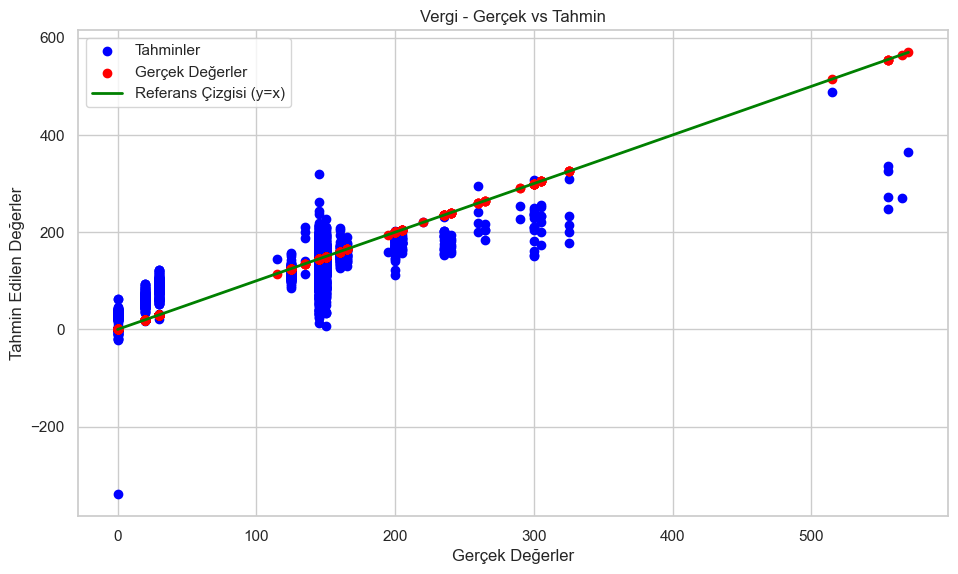

In [138]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test_vergi, y_pred_vergi, color='blue', label='Tahminler')

plt.scatter(y_test_vergi, y_test_vergi, color='red', label='Gerçek Değerler')

plt.plot([min(y_test_vergi), max(y_test_vergi)], 
         [min(y_test_vergi), max(y_test_vergi)], 
         color='green', lw=2, label='Referans Çizgisi (y=x)')

plt.title('Vergi - Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()

plt.show()


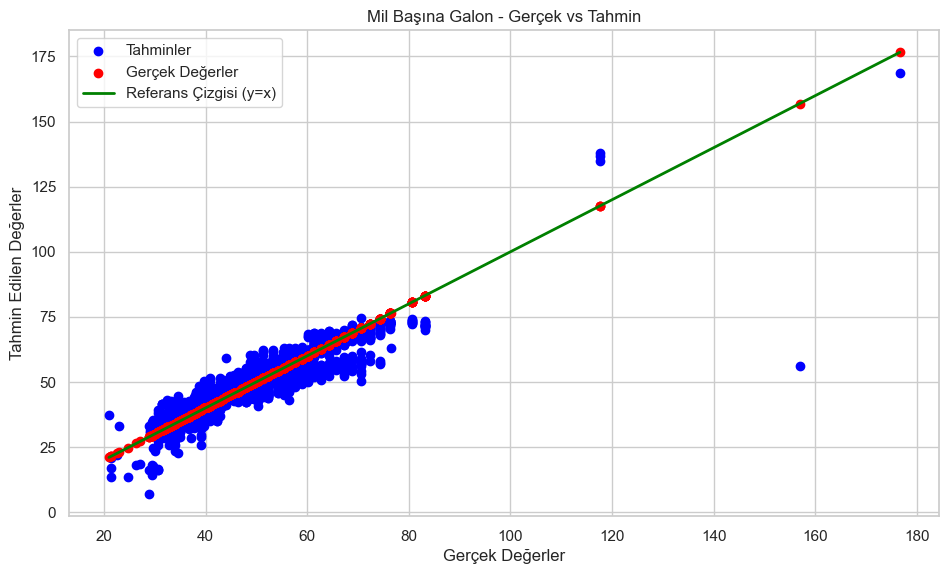

In [139]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test_mil_basına_galon, y_pred_mil_basına_galon, color='blue', label='Tahminler')

plt.scatter(y_test_mil_basına_galon, y_test_mil_basına_galon, color='red', label='Gerçek Değerler')

plt.plot([min(y_test_mil_basına_galon), max(y_test_mil_basına_galon)], 
         [min(y_test_mil_basına_galon), max(y_test_mil_basına_galon)], 
         color='green', lw=2, label='Referans Çizgisi (y=x)')

plt.title('Mil Başına Galon - Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()

plt.show()


In [140]:
poly_vergi = PolynomialFeatures(degree=2)
X_poly_vergi = poly_vergi.fit_transform(X_train_vergi)

poly_model_vergi = LinearRegression()
poly_model_vergi.fit(X_poly_vergi, y_train_vergi)

X_test_poly_vergi = poly_vergi.transform(X_test_vergi)
y_poly_pred_vergi = poly_model_vergi.predict(X_test_poly_vergi)

mse_poly_vergi = mean_squared_error(y_test_vergi, y_poly_pred_vergi)
r2_poly_vergi = r2_score(y_test_vergi, y_poly_pred_vergi)

print("Polinomsal Regresyon - MSE:", mse_poly_vergi)
print("Polinomsal Regresyon - R2:", r2_poly_vergi)


Polinomsal Regresyon - MSE: 61826014.46038078
Polinomsal Regresyon - R2: -14642.889086491134


In [141]:
poly_mil_basına_galon = PolynomialFeatures(degree=2)
X_poly_mil_basına_galon = poly_mil_basına_galon.fit_transform(X_train_mil_basına_galon)

poly_model_mil_basına_galon = LinearRegression()
poly_model_mil_basına_galon.fit(X_poly_mil_basına_galon, y_train_mil_basına_galon)

X_test_poly_mil_basına_galon = poly_mil_basına_galon.transform(X_test_mil_basına_galon)
y_poly_pred_mil_basına_galon = poly_model_mil_basına_galon.predict(X_test_poly_mil_basına_galon)

mse_poly_mil_basına_galon = mean_squared_error(y_test_mil_basına_galon, y_poly_pred_mil_basına_galon)
r2_poly_mil_basına_galon = r2_score(y_test_mil_basına_galon, y_poly_pred_mil_basına_galon)

print("Polinomsal Regresyon - MSE:", mse_poly_mil_basına_galon)
print("Polinomsal Regresyon - R2:", r2_poly_mil_basına_galon)


Polinomsal Regresyon - MSE: 4071.1308150590776
Polinomsal Regresyon - R2: -25.715309385733942


In [142]:
ridge_model_vergi = Ridge(alpha=1.0)
lasso_model_vergi = Lasso(alpha=0.1)
elastic_model_vergi = ElasticNet(alpha=0.1, l1_ratio=0.7)

ridge_model_vergi.fit(X_train_vergi, y_train_vergi)
lasso_model_vergi.fit(X_train_vergi, y_train_vergi)
elastic_model_vergi.fit(X_train_vergi, y_train_vergi)

y_pred_ridge = ridge_model_vergi.predict(X_test_vergi)
y_pred_lasso = lasso_model_vergi.predict(X_test_vergi)
y_pred_elastic = elastic_model_vergi.predict(X_test_vergi)

mse_ridge_vergi = mean_squared_error(y_test_vergi, y_pred_ridge)
r2_ridge_vergi = r2_score(y_test_vergi, y_pred_ridge)

mse_lasso_vergi = mean_squared_error(y_test_vergi, y_pred_lasso)
r2_lasso_vergi = r2_score(y_test_vergi, y_pred_lasso)

mse_elastic_vergi = mean_squared_error(y_test_vergi, y_pred_elastic)
r2_elastic_vergi = r2_score(y_test_vergi, y_pred_elastic)

print("********************************************\n")
print("Ridge Regresyon - MSE:", mse_ridge_vergi)
print("Ridge Regresyon - R2:", r2_ridge_vergi)
print("\n********************************************\n")
print("Lasso Regresyon - MSE:", mse_lasso_vergi)
print("Lasso Regresyon - R2:", r2_lasso_vergi)
print("\n********************************************\n")
print("ElasticNet Regresyon - MSE:", mse_elastic_vergi)
print("ElasticNet Regresyon - R2:", r2_elastic_vergi)
print("\n********************************************\n")


********************************************

Ridge Regresyon - MSE: 1805.302712395067
Ridge Regresyon - R2: 0.5724024438807058

********************************************

Lasso Regresyon - MSE: 1820.9872037192215
Lasso Regresyon - R2: 0.5686874712541565

********************************************

ElasticNet Regresyon - MSE: 2072.7837010824464
ElasticNet Regresyon - R2: 0.5090478517196175

********************************************



In [143]:
ridge_model_mil_basına_galon = Ridge(alpha=1.0)
lasso_model_mil_basına_galon = Lasso(alpha=0.1)
elastic_model_mil_basına_galon = ElasticNet(alpha=0.1, l1_ratio=0.7)

ridge_model_mil_basına_galon.fit(X_train_mil_basına_galon, y_train_mil_basına_galon)
lasso_model_mil_basına_galon.fit(X_train_mil_basına_galon, y_train_mil_basına_galon)
elastic_model_mil_basına_galon.fit(X_train_mil_basına_galon, y_train_mil_basına_galon)

y_pred_ridge = ridge_model_mil_basına_galon.predict(X_test_mil_basına_galon)
y_pred_lasso = lasso_model_mil_basına_galon.predict(X_test_mil_basına_galon)
y_pred_elastic = elastic_model_mil_basına_galon.predict(X_test_mil_basına_galon)

mse_ridge_mil_basına_galon = mean_squared_error(y_test_mil_basına_galon, y_pred_ridge)
r2_ridge_mil_basına_galon = r2_score(y_test_mil_basına_galon, y_pred_ridge)

mse_lasso_mil_basına_galon = mean_squared_error(y_test_mil_basına_galon, y_pred_lasso)
r2_lasso_mil_basına_galon = r2_score(y_test_mil_basına_galon, y_pred_lasso)

mse_elastic_mil_basına_galon = mean_squared_error(y_test_mil_basına_galon, y_pred_elastic)
r2_elastic_mil_basına_galon = r2_score(y_test_mil_basına_galon, y_pred_elastic)

print("********************************************\n")
print("Ridge Regresyon - MSE:", mse_ridge_mil_basına_galon)
print("Ridge Regresyon - R2:", r2_ridge_mil_basına_galon)
print("\n********************************************\n")
print("Lasso Regresyon - MSE:", mse_lasso_mil_basına_galon)
print("Lasso Regresyon - R2:", r2_lasso_mil_basına_galon)
print("\n********************************************\n")
print("ElasticNet Regresyon - MSE:", mse_elastic_mil_basına_galon)
print("ElasticNet Regresyon - R2:", r2_elastic_mil_basına_galon)
print("\n********************************************\n")


********************************************

Ridge Regresyon - MSE: 27.568985666103735
Ridge Regresyon - R2: 0.8190885984806809

********************************************

Lasso Regresyon - MSE: 31.85941509942013
Lasso Regresyon - R2: 0.7909342219903143

********************************************

ElasticNet Regresyon - MSE: 42.94503859618245
ElasticNet Regresyon - R2: 0.7181888657481887

********************************************



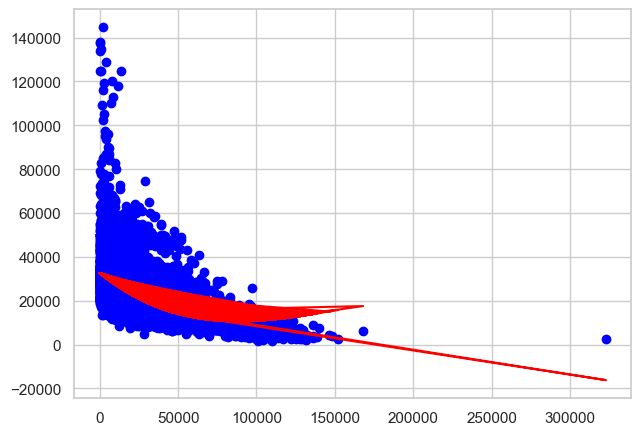

In [144]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

X = df[['kilometre']].values
y = df['fiyat'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=10)

print('Doğrulama skorları:', scores)


Doğrulama skorları: [-0.228926   -0.42268575 -0.16400376  0.03912424 -0.07125623 -0.59789245
 -0.1390174  -0.04561103  0.03317069  0.0690202 ]


In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from plotly import express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeavePOut, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn import tree
pyplot.style.use('fivethirtyeight')
pyplot.style.use('dark_background')



In [147]:
dataset = pd.read_csv('audi.csv')

In [148]:
dataset.columns


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

model: model
year: yıl
price: fiyat
transmission: vites 
mileage: kilometre
fuelType: yakıt türü
tax: vergi
mpg: yakıt tüketimi 
engineSize: motor hacmi

In [149]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [150]:
dataset.tail(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4


In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [152]:
dataset["fuelType"].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [153]:
unique_fuel_types = dataset["fuelType"].unique()
model_dict = {models: index for index, models in enumerate(unique_fuel_types)}


unique_fuel_class = dataset["model"].unique()
fuel_class_dict = {s_class: index for index, s_class in enumerate(unique_fuel_class)}

model_dict,fuel_class_dict

({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2},
 {' A1': 0,
  ' A6': 1,
  ' A4': 2,
  ' A3': 3,
  ' Q3': 4,
  ' Q5': 5,
  ' A5': 6,
  ' S4': 7,
  ' Q2': 8,
  ' A7': 9,
  ' TT': 10,
  ' Q7': 11,
  ' RS6': 12,
  ' RS3': 13,
  ' A8': 14,
  ' Q8': 15,
  ' RS4': 16,
  ' RS5': 17,
  ' R8': 18,
  ' SQ5': 19,
  ' S8': 20,
  ' SQ7': 21,
  ' S3': 22,
  ' S5': 23,
  ' A2': 24,
  ' RS7': 25})

In [154]:
dataset_replaced = dataset.copy()
dataset_replaced["fuelType"] = dataset_replaced["fuelType"].replace(model_dict)
dataset_replaced.head()

dataset_replaced["model"] = dataset_replaced["model"].replace(fuel_class_dict)
dataset_replaced.head()

C:\Users\nissa\AppData\Local\Temp\ipykernel_19696\286558871.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\nissa\AppData\Local\Temp\ipykernel_19696\286558871.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,Manual,15735,0,150,55.4,1.4
1,1,2016,16500,Automatic,36203,1,20,64.2,2.0
2,0,2016,11000,Manual,29946,0,30,55.4,1.4
3,2,2017,16800,Automatic,25952,1,145,67.3,2.0
4,3,2019,17300,Manual,1998,0,145,49.6,1.0


In [155]:
dataset_replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  int64  
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  int64  
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 750.2+ KB


In [156]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')


,count,mean,std,min,25%,50%,75%,max
year,10668.000000,2017.100675,2.167494,1997.000000,2016.000000,2017.000000,2019.000000,2020.000000
price,10668.000000,22896.685039,11714.841888,1490.000000,15130.750000,20200.000000,27990.000000,145000.000000
mileage,10668.000000,24827.244001,23505.257205,1.000000,5968.750000,19000.000000,36464.500000,323000.000000
tax,10668.000000,126.011436,67.170294,0.000000,125.000000,145.000000,145.000000,580.000000
mpg,10668.000000,50.770022,12.949782,18.900000,40.900000,49.600000,58.900000,188.300000
engineSize,10668.000000,1.930709,0.602957,0.000000,1.500000,2.000000,2.000000,6.300000


In [157]:
fig = px.box(dataset, x="fuelType", y="model", template = 'plotly_dark', 
             title = 'FuelTypes vs Models')
fig.show()

In [158]:
count_df = dataset.groupby(['model', 'fuelType']).size().reset_index(name='count')
spectral_class_order = [' A1',
  ' A6',
  ' A4',
  ' A3',
  ' Q3',
  ' Q5',
  ' A5',
  ' S4',
  ' Q2',
  ' A7',
  ' TT',
  ' Q7',
  ' RS6',
  ' RS3',
  ' A8',
  ' Q8',
  ' RS4',
  ' RS5',
  ' R8',
  ' SQ5',
  ' S8',
  ' SQ7',
  ' S3',
  ' S5',
  ' A2',
  ' RS7'][::-1]
count_df['model'] = pd.Categorical(count_df['model'], categories=spectral_class_order)
count_df.sort_values(by = ['model','fuelType'], inplace=True)
count_df.reset_index(drop=True, inplace=True)

In [159]:

fig = px.bar(count_df, y='model', x='count', color='fuelType', barmode='stack',template = 'plotly_dark')
fig.update_layout(yaxis_title='model', xaxis_title='Count', title='Count of Fuel Types for models')
fig.show()


In [160]:
grouped_df = count_df.groupby('model').sum().reset_index().drop('fuelType', axis=1)
fig = px.bar(grouped_df, x='count', y='model', orientation='h', color='model',
             title='Count of Models',template='plotly_dark')
fig.show()

C:\Users\nissa\AppData\Local\Temp\ipykernel_19696\414398833.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [161]:
fig = px.scatter(dataset, x="engineSize", y="price", color="fuelType", template = 'plotly_dark',
                 title = 'engine size and price of fuel types')
fig.show()

In [162]:

fig = px.scatter_3d(dataset, x="engineSize", y ="price", z='transmission', title = 'EngineSize vs Price',color='model', template = 'plotly_dark')
fig.show()

In [163]:
fig = px.scatter_ternary(dataset, a="price", b="mileage", c="engineSize",hover_name="model",
    color="mpg", template = 'plotly_dark',size="tax", size_max=30,)
fig.show()



In [164]:
fig = px.scatter_3d(dataset, x='mileage', y='model', z='price',
                    
              color='fuelType', template = 'plotly_dark', title = 'Distribution of Mileage and Price with their Models')
fig.show()

In [165]:
fig = px.pie(dataset, names='model', values='year', template = 'plotly_dark', 
             title = 'Representation of Models with their Release Year')
fig.show()

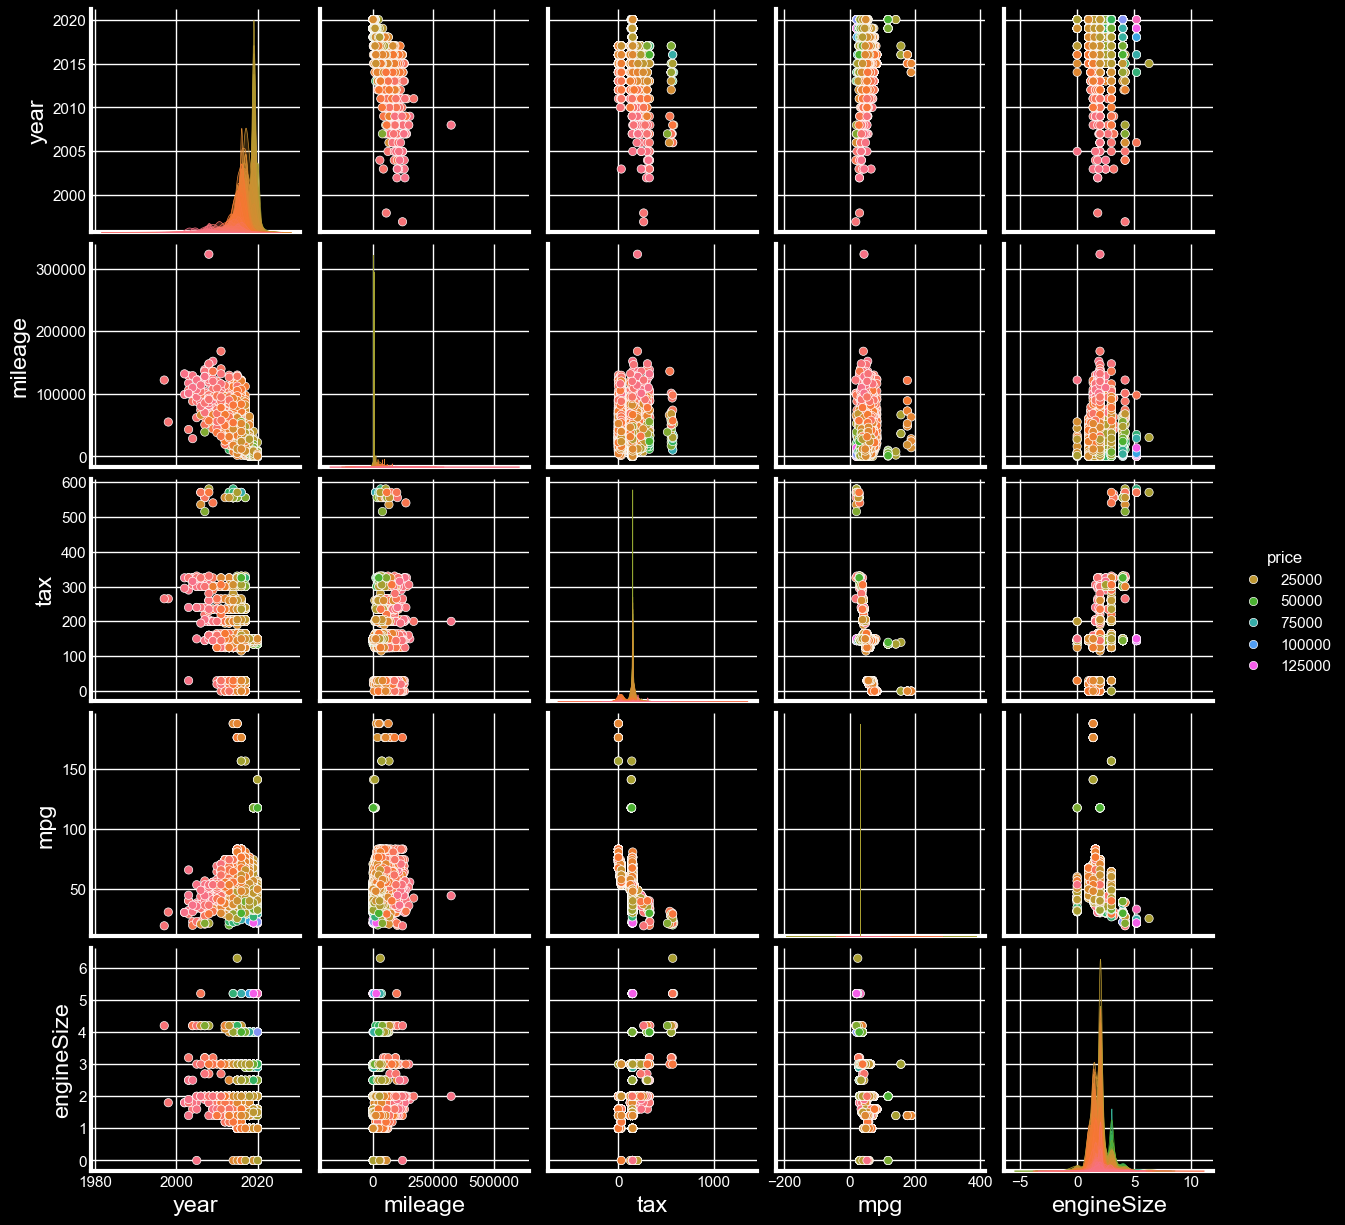

In [166]:
sns.pairplot(dataset, hue="price", palette="husl");
